In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:/customer_churn_large_dataset.csv")
#Reading Dataset

# Data Preprocessing

In [3]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [4]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [5]:
df.shape
# There are 100000 rows and 9 columns

(100000, 9)

In [6]:
df.info()
# Checking the information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [7]:
df.isnull().sum()
# There are no null values in the dataset

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [8]:
df['Churn'].value_counts()
# As it can be seen target column is mostly balanced,there are 50221 zero's and 49779 one's. so they are almost equal in number.

0    50221
1    49779
Name: Churn, dtype: int64

In [9]:
df = df.drop(columns=["CustomerID", "Name"])
# dropping the Name and CustomerID columns as it will not make any sense in predicting the churn.It increase the dimensionality.

In [10]:
df.describe()
# The describe displays all the decriptive statistics of the data including mean, std, min, max values.

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790
std,15.280283,6.926461,20.230696,130.463063,0.499998
min,18.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,24.000000,100.000000,500.000000,1.000000


In [11]:
df.nunique()
#it is used to count the number of unique values in each column of a DataFrame. 

Age                             53
Gender                           2
Location                         5
Subscription_Length_Months      24
Monthly_Bill                  7001
Total_Usage_GB                 451
Churn                            2
dtype: int64

In [12]:
categorical_variables = []




for col in df.columns:
    if df[col].dtype == "object" or df[col].nunique() <= 11 and col != "churn":
        categorical_variables.append(col)

        
categorical_variables             
#Columns with a low number of unique values might represent categorical variables with limited variability.
#That's why df[col].nunique() <=11 is used.
#we can see, we have three categorical varialbes present in which one is our target variable i.e. churn.

['Gender', 'Location', 'Churn']

In [13]:
numeric_variables = []

for col in df.columns:
    if df[col].dtype != "object" and df[col].nunique() > 11:
        numeric_variables.append(col)

numeric_variables        
# so total we have 4 numerical variables present.

['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

In [14]:
for var in numeric_variables:
    low_quantile = 0.05
    up_quantile = 0.95
    for col in [var]:
        quantile_one = df[col].quantile(low_quantile)
        quantile_three = df[col].quantile(up_quantile)
        interquantile_range = quantile_three - quantile_one
        up_limit = quantile_three + 1.5 * interquantile_range
        low_limit = quantile_one - 1.5 * interquantile_range
        
        outliers = (df[col] > up_limit) | (df[col] < low_limit)
        number_of_outliers = outliers.sum()
        if number_of_outliers > 0:
            print(col, ":", number_of_outliers, "outliers")
        else:
            print('No outliers')
     
    
# we can see, there is no outlier present in the dataset.    

No outliers
No outliers
No outliers
No outliers


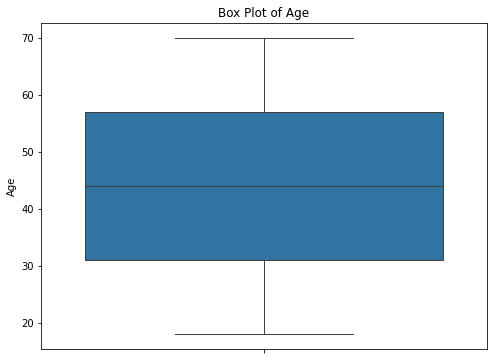

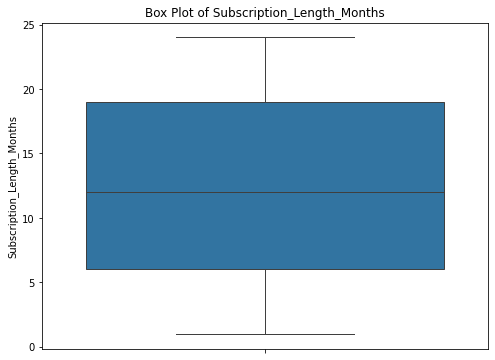

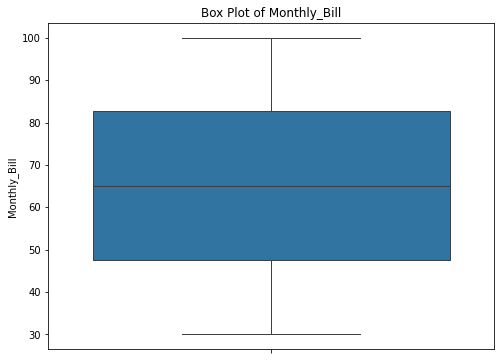

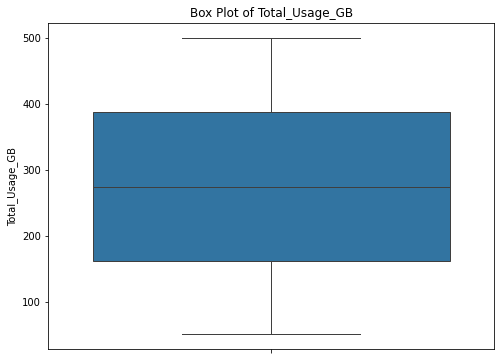

In [15]:
# Create a box plot for each numeric variable
for var in numeric_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=var, data=df)
    plt.title(f'Box Plot of {var}')
    plt.show()

#Box Plot also confirms that we have no outlier present in the dataset    

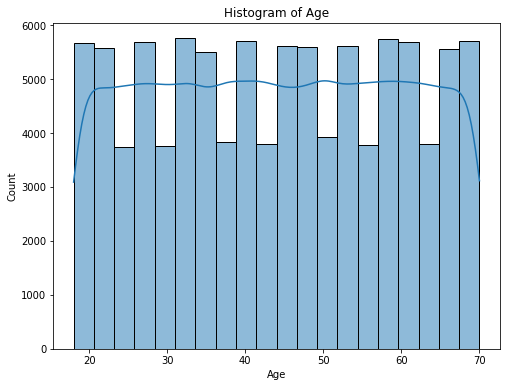

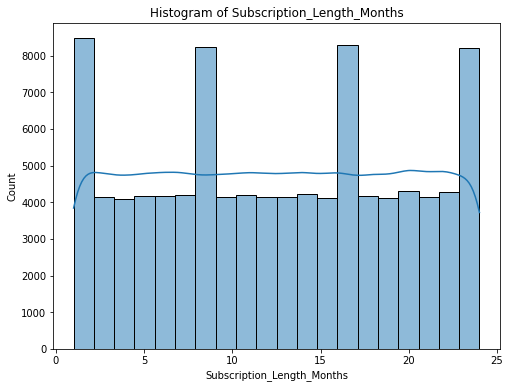

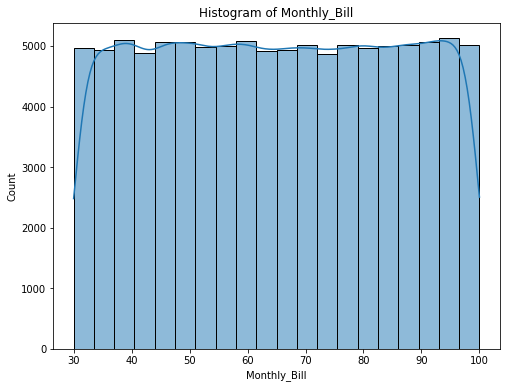

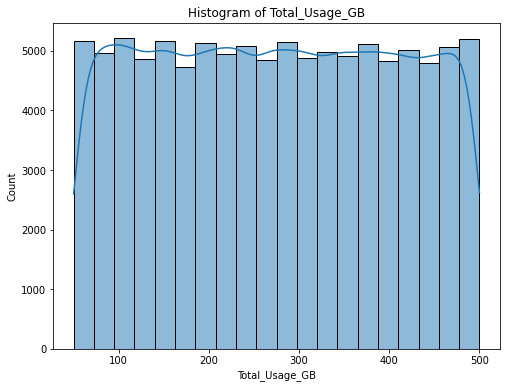

In [16]:
# Create histograms for each numeric variable
for var in numeric_variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=var, bins=20, kde=True)
    plt.title(f'Histogram of {var}')
    plt.show()

If the probability density function (PDF) in a histogram has a rectangular pattern, it suggests that the data might follow a uniform distribution.

A uniform distribution, also known as a rectangular distribution, is a type of probability distribution in which all values within a certain range are equally likely to occur. In a histogram, a uniform distribution would appear as a flat, rectangular shape, where all values have similar frequencies.

In a uniform distribution:

All values have the same probability of occurring.
The PDF is constant within a specific interval and zero outside that interval.
The data is spread out evenly across the entire range.
Keep in mind that while a rectangular pattern in the PDF suggests a uniform distribution, it's important to perform further analysis and statistical tests to confirm the nature of the distribution. Other factors like sample size, data collection methods, and underlying processes can influence the shape of the distribution.

In [17]:
# Checking the non-numeric columns
df_cat = df.select_dtypes(exclude=[np.number])

df_cat.head()

,Gender,Location
0,Male,Los Angeles
1,Female,New York
2,Female,Los Angeles
3,Female,Miami
4,Female,Miami


In [18]:
df_num = df.select_dtypes(exclude=[object])
df_num.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,17,73.36,236,0
1,62,1,48.76,172,0
2,24,5,85.47,460,0
3,36,3,97.94,297,1
4,46,19,58.14,266,0


In [19]:
# categorical columns
df_cat.columns

Index(['Gender', 'Location'], dtype='object')

In [20]:
# How many unique values does each categorical variable has? 
# What are they?

for col in df_cat.columns:
    print(col,'has {} unique values.'.format(df_cat[col].nunique()))
    print(df_cat[col].unique())
    print('------------------------------------------------------------')

Gender has 2 unique values.
['Male' 'Female']
------------------------------------------------------------
Location has 5 unique values.
['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']
------------------------------------------------------------


You have two categorical columns: 'Gender' and 'Location'. To prepare these categorical variables for machine learning, you can use one-hot encoding. One-hot encoding will create binary columns for each category in these variables.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [22]:
# Separate target variable
y = df['Churn']
X = df.drop('Churn', axis=1)

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Display the training and testing sets
print("X_train:\n", X_train)
print("\nX_test:\n", X_test)
print("\ny_train:\n", y_train)
print("\ny_test:\n", y_test)


X_train:
        Age  Gender     Location  Subscription_Length_Months  Monthly_Bill  \
75220   54  Female     New York                           5         84.50   
48955   28    Male     New York                          24         82.06   
44966   57    Male      Chicago                          12         52.29   
13568   19    Male      Houston                          19         32.57   
92727   56  Female        Miami                           8         33.52   
...    ...     ...          ...                         ...           ...   
6265    35    Male        Miami                          21         67.33   
54886   56    Male      Chicago                          13         85.40   
76820   69    Male      Houston                           2         76.24   
860     55    Male      Chicago                          12         89.19   
15795   26  Female  Los Angeles                          17         70.41   

       Total_Usage_GB  
75220             205  
48955            

Feature Engineering:
You can generate relevant features based on domain knowledge or relationships between columns. Here's an example of creating a new feature by calculating the ratio of Monthly_Bill to Total_Usage_GB:

In [25]:
X_train['Bill_Per_GB'] = X_train['Monthly_Bill'] / X_train['Total_Usage_GB']
X_test['Bill_Per_GB'] = X_test['Monthly_Bill'] / X_test['Total_Usage_GB']


Encoding Categorical Variables:

In [26]:
# Encode categorical variables using pd.get_dummies()
X_train_encoded = pd.get_dummies(X_train, columns=['Gender', 'Location'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['Gender', 'Location'], drop_first=True)

In [27]:
X_train_encoded

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Bill_Per_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
75220,54,5,84.50,205,0.412195,0,0,0,0,1
48955,28,24,82.06,239,0.343347,1,0,0,0,1
44966,57,12,52.29,62,0.843387,1,0,0,0,0
13568,19,19,32.57,173,0.188266,1,1,0,0,0
92727,56,8,33.52,314,0.106752,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
6265,35,21,67.33,235,0.286511,1,0,0,1,0
54886,56,13,85.40,347,0.246110,1,0,0,0,0
76820,69,2,76.24,321,0.237508,1,1,0,0,0
860,55,12,89.19,315,0.283143,1,0,0,0,0


In [28]:
# Feature scaling (numerical features)
scaler = StandardScaler()
numerical_features = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Bill_Per_GB']
X_train_encoded[numerical_features] = scaler.fit_transform(X_train_encoded[numerical_features])
X_test_encoded[numerical_features] = scaler.transform(X_test_encoded[numerical_features])

In [29]:
# Display the final feature-engineered datasets
print("\nX_train_encoded:\n", X_train_encoded)
print("\nX_test_encoded:\n", X_test_encoded)


X_train_encoded:
             Age  Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  \
75220  0.653447                   -1.082728      0.960255       -0.533774   
48955 -1.048276                    1.663882      0.839624       -0.273257   
44966  0.849799                   -0.070819     -0.632174       -1.629476   
13568 -1.637334                    0.941090     -1.607109       -0.778966   
92727  0.784348                   -0.649053     -1.560142        0.301412   
...         ...                         ...           ...             ...   
6265  -0.590120                    1.230207      0.111388       -0.303906   
54886  0.784348                    0.073739      1.004750        0.554266   
76820  1.635210                   -1.516404      0.551889        0.355047   
860    0.718898                   -0.070819      1.192123        0.309074   
15795 -1.179177                    0.651973      0.263660        0.462319   

       Bill_Per_GB  Gender_Male  Location_Houston  Locat

In [30]:
!pip install xgboost

In [31]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [32]:
# List of models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42))
]


In [33]:
# Train, validate, and evaluate each model
for name, model in models:
    print(f"Training {name}...")
    model.fit(X_train_encoded, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_encoded)
    
    # Evaluate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("-" * 40)

Training Logistic Regression...
Logistic Regression Metrics:
Accuracy: 0.50
Precision: 0.50
Recall: 0.38
F1-Score: 0.43
----------------------------------------
Training Random Forest...
Random Forest Metrics:
Accuracy: 0.49
Precision: 0.49
Recall: 0.47
F1-Score: 0.48
----------------------------------------
Training Decision Tree...
Decision Tree Metrics:
Accuracy: 0.50
Precision: 0.49
Recall: 0.50
F1-Score: 0.50
----------------------------------------
Training AdaBoost...
AdaBoost Metrics:
Accuracy: 0.50
Precision: 0.50
Recall: 0.46
F1-Score: 0.48
----------------------------------------
Training XGBoost...
XGBoost Metrics:
Accuracy: 0.50
Precision: 0.49
Recall: 0.47
F1-Score: 0.48
----------------------------------------


In [34]:
!pip install hyperopt

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from hyperopt import hp, fmin, tpe, Trials

In [40]:
from hyperopt import hp

param_space = {
    'n_estimators': hp.choice('n_estimators', [50, 100, 200, 300]),
    'max_depth': hp.choice('max_depth', [None, 10, 20, 30]),
    'max_features': hp.choice('max_features', ['sqrt', 'log2', None]), 
    'min_samples_split': hp.uniform('min_samples_split', 0.01, 0.5),
    'min_samples_leaf': hp.uniform('min_samples_leaf', 0.01, 0.5),
}


In [41]:
# Define a custom scoring function for hyperopt
scoring = make_scorer(f1_score, average='binary')

In [42]:
# Define the model and hyperparameter search
def objective(params):
    clf = RandomForestClassifier(**params)
    return -np.mean(cross_val_score(clf, X_train_encoded, y_train, cv=5, scoring=scoring))

In [43]:
# Use hyperopt to find the best hyperparameters
trials = Trials()
best = fmin(fn=objective, space=param_space, algo=tpe.suggest, max_evals=100, trials=trials)

100%|███████████████████████████████████████████| 100/100 [1:19:53<00:00, 47.93s/trial, best loss: -0.4768405131248299]


In [44]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(best)

Best Hyperparameters:
{'max_depth': 0, 'max_features': 2, 'min_samples_leaf': 0.010125967288044135, 'min_samples_split': 0.013186368270177554, 'n_estimators': 2}


In [46]:
best_hyperparameters = {
    'n_estimators': np.arange(50, 201, 50)[int(best['n_estimators'])],
    'max_depth': np.arange(5, 21, 5)[int(best['max_depth'])],
    'min_samples_split': np.arange(2, 11, 1)[int(best['min_samples_split'])],
    'min_samples_leaf': np.arange(1, 11, 1)[int(best['min_samples_leaf'])],
    'max_features': ['sqrt', 'log2', None][int(best['max_features'])]  
}

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_hyperparameters)


Best Hyperparameters:
{'n_estimators': 150, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None}


In [47]:
# List of models with their best hyperparameters
models = [
    ('Logistic Regression', LogisticRegression()),  # No need to pass hyperparameters
    ('Random Forest', RandomForestClassifier(**best_hyperparameters, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),  # No need to pass hyperparameters
    ('AdaBoost', AdaBoostClassifier(n_estimators=best_hyperparameters['n_estimators'], random_state=42)),
    ('XGBoost', XGBClassifier(**best_hyperparameters, random_state=42))
]



In [48]:
# Train and evaluate each model
for name, model in models:
    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_test_encoded)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("----------------------------------------")

Model: Logistic Regression
Accuracy: 0.50
Precision: 0.50
Recall: 0.38
F1-Score: 0.43
----------------------------------------
Model: Random Forest
Accuracy: 0.50
Precision: 0.50
Recall: 0.31
F1-Score: 0.38
----------------------------------------
Model: Decision Tree
Accuracy: 0.50
Precision: 0.49
Recall: 0.50
F1-Score: 0.50
----------------------------------------
Model: AdaBoost
Accuracy: 0.50
Precision: 0.50
Recall: 0.45
F1-Score: 0.47
----------------------------------------
[22:50:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

Model: XGBoost
Accuracy: 0.50
Precision: 0.50
Recall: 0.48
F1-Score: 0.49
----------------------------------------
